<a href="https://colab.research.google.com/github/harshvardan-kv/DL/blob/kag_commands/CAPTCHA_WIP-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
token = "****"
username = "harshvardan-kv"


In [2]:

!git clone -b kag_commands https://{token}@github.com/{username}/DL


Cloning into 'DL'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 83 (delta 31), reused 44 (delta 8), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [3]:
%cd DL

/content/DL


In [ ]:
!unzip captcha-version-2-images.zip -d input

In [4]:
%%writefile .gitignore
.gitignore
__pycache__
/sample_data/
/.config/
/input/

Writing .gitignore


In [ ]:
!mkdir input

In [ ]:
!unzip captcha-version-2-images.zip -d ./input/

In [27]:
!git add .

In [3]:
!git config --global user.email "harshvardan.kv@gmail.com"
!git config --global user.name "hv"

In [28]:
!git commit -m "files_5"

[kag_commands 0ade71c] files_5
 4 files changed, 26 insertions(+), 27 deletions(-)


In [54]:
!git status

On branch kag_commands
Your branch is ahead of 'origin/kag_commands' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [22]:
!git remote add origin https://{token}@github.com/{username}/DL

fatal: remote origin already exists.


In [29]:
!git push origin kag_commands

Counting objects: 7, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 758 bytes | 758.00 KiB/s, done.
Total 7 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To https://github.com/harshvardan-kv/DL
   5c59ad3..0ade71c  kag_commands -> kag_commands


In [24]:
!pwd

/content/DL


In [25]:
from src.Dataset import Classification

In [51]:

os.path.join(cnf1.DATA_DIR,"*.png")


'../input/samples/*.png'

In [18]:
import os
import glob
import src.config as cnf1
img_files = glob.glob("./input/samples/*.png")

In [19]:
print(len(img_files))

1040


In [149]:
im_list = img_files[0:5]
f_name = [x.split("/")[-1][:-4] for x in im_list]

flist = [[c for c in x] for x in f_name]

In [150]:
flist

[['7', 'c', 'g', 'y', 'm'],
 ['8', '2', '3', 'p', '2'],
 ['w', '6', 'y', 'n', 'e'],
 ['8', 'n', 'p', 'e', '3'],
 ['p', 'y', 'b', 'e', 'e']]

In [154]:
flat_list = [items for item in flist for items in item]

In [155]:
from sklearn import preprocessing

lbl = preprocessing.LabelEncoder()
lbl.fit(flat_list)

LabelEncoder()

In [157]:

[lbl.transform(x) for x in flist]

[array([ 3,  6,  8, 13,  9]),
 array([ 4,  0,  1, 11,  0]),
 array([12,  2, 13, 10,  7]),
 array([ 4, 10, 11,  7,  1]),
 array([11, 13,  5,  7,  7])]

In [67]:
cl = Classification(img_files[0:5])

In [68]:
len(cl)

5

In [172]:
!python ./src/train.py

[[ 6  9 13 19 14]
 [ 7  1  2 16  1]
 [17  5 19 15 11]
 ...
 [ 1 16 12 16 15]
 [11 11  7 12 13]
 [12  7 12  7 13]]
19
['./input/samples/m457d.png', './input/samples/53wp3.png'] [[14  3  4  6 10]
 [ 4  2 17 16  2]] ['m457d', '53wp3']
{'images': tensor([[[1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
         [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
         [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
         ...,
         [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
         [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
         [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318]],

        [[1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
         [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
         [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
         ...,
         [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
         [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
         [1.

In [189]:
from PIL import Image
img = Image.open(img_files[0])
image = np.array(img)

In [192]:
image.shape

(50, 200, 4)

In [195]:
image = np.transpose(image,(2,0,1)).astype(np.float32)

In [196]:
image.shape

(4, 50, 200)

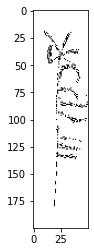

In [201]:
import matplotlib.pyplot as plt
plt.imshow(np.transpose(image,(2,1,0)))


In [110]:
image = img.resize((200,100),resample = Image.LANCZOS)

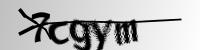

In [152]:
display(img)

In [141]:
import numpy as np


In [144]:
import albumentations
aug = albumentations.Compose(
      [
        albumentations.Normalize(always_apply=True)
      ]
    )

In [146]:
abc = [[1,2,3],[4,5,6]]

In [147]:
[items for item in abc for items in item]

[1, 2, 3, 4, 5, 6]

In [140]:
Image.fromarray(image-mean)

TypeError: ignored

In [128]:
aug(image = image)

ValueError: ignored

In [176]:
!cd DL

/bin/bash: line 0: cd: DL: No such file or directory


In [181]:
%cd ..

/content/DL


In [193]:
import os
import glob
import torch
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import Dataset


image_files = glob.glob(os.path.join(config.DATA_DIR,"*.png"))
target_orig = [x.split("/")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in target_orig]
targets_flat = [items for item in targets for items in item]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)

target_enc = [lbl_enc.transform(x) for x in targets]
target_enc = np.array(target_enc)+1

train_imgs,test_imgs, train_targets, test_targets, train_orig_targets , test_orig_targets  = model_selection.train_test_split(image_files,target_enc,target_orig,test_size = 0.1, random_state=42)


train_Dataset = Dataset.Classification(train_imgs,train_targets)
print(train_Dataset[0]["images"].shape)






torch.Size([3, 50, 200])


In [204]:
npimg = train_Dataset[100]["images"].numpy()

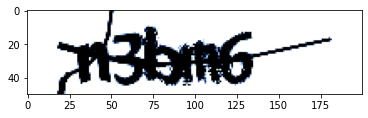

In [205]:
plt.imshow(np.transpose(npimg,(1,2,0)))

In [214]:
d = [item for item in range(10000000)]

In [216]:
from tqdm import tqdm

tk = tqdm(d,total=len(d))
for data in tk:
  pass

100%|██████████| 10000000/10000000 [00:02<00:00, 4162276.12it/s]


In [230]:
!python ./src/model.py

5 3 75 300
torch.Size([5, 128, 75, 300])
torch.Size([5, 128, 37, 150])
torch.Size([5, 64, 37, 150])
torch.Size([5, 64, 18, 75])
torch.Size([5, 75, 64, 18])
torch.Size([5, 75, 1152])
torch.Size([5, 75, 64])
torch.Size([5, 75, 64])
torch.Size([5, 75, 45])
torch.Size([75, 5, 45])
tensor([75, 75, 75, 75, 75], dtype=torch.int32)
tensor([5, 5, 5, 5, 5], dtype=torch.int32)


In [17]:
!python ./src/train.py

100% 117/117 [00:02<00:00, 57.63it/s]
100% 117/117 [00:02<00:00, 57.29it/s]
100% 117/117 [00:02<00:00, 55.44it/s]
100% 117/117 [00:02<00:00, 56.27it/s]
100% 117/117 [00:02<00:00, 55.93it/s]
100% 117/117 [00:02<00:00, 57.32it/s]
100% 117/117 [00:02<00:00, 57.01it/s]
100% 117/117 [00:02<00:00, 57.94it/s]
100% 117/117 [00:02<00:00, 56.76it/s]
100% 117/117 [00:02<00:00, 57.31it/s]
100% 117/117 [00:02<00:00, 55.41it/s]
100% 117/117 [00:02<00:00, 57.22it/s]
100% 117/117 [00:02<00:00, 57.32it/s]
100% 117/117 [00:02<00:00, 57.56it/s]
100% 117/117 [00:02<00:00, 55.91it/s]
100% 117/117 [00:02<00:00, 57.47it/s]
100% 117/117 [00:02<00:00, 57.42it/s]
100% 117/117 [00:02<00:00, 56.34it/s]
100% 117/117 [00:02<00:00, 55.48it/s]
100% 117/117 [00:02<00:00, 56.82it/s]
100% 117/117 [00:02<00:00, 56.83it/s]
100% 117/117 [00:02<00:00, 56.52it/s]
100% 117/117 [00:02<00:00, 55.78it/s]
100% 117/117 [00:02<00:00, 57.37it/s]
100% 117/117 [00:02<00:00, 57.41it/s]
100% 117/117 [00:02<00:00, 57.43it/s]
100% 117/117